### <p style="text-align: right;"> &#9989; Elizabeth Walter</p>

# Day 13 In-Class Assignment
---

## Fitting models to data -- and being thoughtful about your choices and results!

<img src="https://s3.amazonaws.com/higherlogicdownload/AMSTAT/UploadedImages/LanMM957S06KqifB8Sj9_temp-M.jpg" alt="covid-models" border="0" width=800px>

When this "cubic" fit for COVID deaths was released it caused a stir and a lot of negative attention from statisticians and modelers. It's important to think about what the right model is for your data!

In this assignment we're going to look at how we might use a meaningful model to understand data.

The **learning goals** of the assignment are to:

* Discuss the role that models play in our understanding of the world around us and how models can be used to make predictions.
* Practice using the SciPY `curve_fit()` function to fit a specific model to data
* Interpret the results of our best fit model
* Use our best fit model to calculate new values and forecast future behavior

### Assignment instructions

Work with your group to complete this assignment. Instructions for submitting this assignment are at the end of the notebook. The assignment is due at the end of class.

---
## 1. Thinking about models and how they help us understand the world around us

&#9989;&nbsp; **In your groups**, take turns providing examples of previous experiences you've had that involved a model (or models) of one form other another. These can be experiences from current or prior courses (outside of CMSE 201!) or experiences from your personal life or from work.

When sharing your example, **you should**:
* Explain the real-world context of the model and what the basic components of the model are.
* Identify and explain any assumptions that are built into the model or limitations of the model (i.e. where might the model breakdown?).

For example: I have a model for how my retirement savings will grow as a function of time and I can use this model to predict how much money I will have when I retire or to understand how early I might be able to retire given the financial needs I will have during my retirement. Assumptions that are built into my retirement model include things like the health of the economy over time and how much money (if any) I might receive from social security when I retire. The accuracy of my model is only as good as the assumptions I base it off of.

&#9989;&nbsp; **Record the details you shared with your group in the cell below**. There will be an opportunity to share out some of these examples as a class.

<font size=+3>&#9998;</font> One model we made in a class once was using data in STATA to perform a multiple regression analysis on the relationship between speed limit laws, seatbelt laws, and annual car accident deaths. 

---
## 2. Using Python to fit specific models to data

In the section that follows, we will practice using Python to fit a model to provided data. When doing so, it is important to think about whether or not these model fits the data well and what information about the data is provided by the model we use.

### Revisiting population growth

In a previous in-class assignment you created a function **based on a model** to project population growth as a function of time based on an initial population, a carry capacity, and a growth rate coefficient. Let's quickly revisit the mathematical logistic growth model for growth of a population:

$$P(t) = \frac{K}{1 + Ae^{-kt}}$$

where 

$$A = \frac{K-P_{init}}{P_{init}}$$

The variable $K$ represents the *carrying capacity* of the population, which is the maximum population that the environment can sustain, and $k$ is the relative growth rate coefficient (the larger $k$ is, the faster the population will grow initially). $P_{init}$ is the initial value of the population at $t=0$.

#### Understanding a logistic growth model

Here are several logistic growth models for when the initial population, $P_{init}$, is **1 billion** but the the carrying capacity, $K$, and the growth rate coefficient, $k$, are varied.

The **first** plot on the keeps $P_{init}$ and $k$ fixed while changing $K$, and the **second** plot on the keeps $P_{init}$ and $K$ fixed while changing $k$.

<div align="center">
<img src="https://i.ibb.co/wsPX16b/population-models-big-K.png" alt="population-models-big-K" border="0">
<img src="https://i.ibb.co/c3sdmjf/population-models-littlek.png" alt="population-models-littlek" border="0">
</div>

&#9989;&nbsp; Questions to make sure you **answer with your group**:
1. What is the impact of $P_{init}$, the initial population, in the model? How would the curves change if you changed this value?
1. What is the impact of $K$, the carrying capacity, in the model? How does this parameter control the shape of the curves in the plot above?
2. What is the impact of $k$, the growth rate coefficient, in the model? How does this parameter control the shape of the curves in the plot above?

Pay special attention to the values for the parameters that made these curves -- they may useful in the next part of the activity!

<font size=+3>&#9998;</font> *Put your answers here.*
* Pinit is the y intercept.
* K determines the maximum of the curve. It affects the 'height' of the curve.
* k affects the steepness of the curve and how much time it takes to get to K


#### Can we use this model to understand some population data?

In the file, `pop200.csv`, you'll find some data for 200 years of population growth for an unknown civilization.

&#9989;&nbsp; Your goal is to **work with your group** to determine if the population growth model presented above is a good approximation for the data that we’ve provided you and what the best fit parameters for that model are:

1. Load the data into your Jupyter notebook and make a plot of the **data alone**. Visualizing your data is always a good first step!
2. Create function for calculating population as a function of time using the mathematical model provided above.
    - Your function needs to take the following arguments in the following order: an array of time values; the initial population, $P_{init}$; the carrying capacity, $K$; and the growth rate coefficient, $k$.
    - Your function needs to **return** an array of the population values.
    - For reference, here is the mathematical representation of the function again:
    $$P(t) = \frac{K}{1 + Ae^{-kt}}$$

    where 

    $$A = \frac{K-P_{init}}{P_{init}}$$
3. Use SciPy's [`curve_fit()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) function to determine a best fit set of model parameters using your function and the provided data.
    - When you first try running `curve_fit()`, you might get a warning and you might get results that don't make sense. Sometimes `curve_fit()` will fail to find a good fit if the initial guess for the best fit parameters is too far off. How would you fix this? Look at the [documentation for `curve_fit`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html), especially the `p0` argument, and see if you and your group can figure out how to overcome this issue. What might be reasonable starting guesses for the initial populuation and the carrying capacity? **Hint**: revisit the plot from above and the parameters that were used to make those models.
4. Make a plot of the data as well as a expected values based on your best fit model parameters.
    - Your plot should plot population (in billions) on the y-axis and time (in years) on the x-axis. Make sure you include appropriate axis labels.
    - Your plot should use a legend to identify what parts of the plot constitute the data and what part represents the expected values from your model.

[1.05555889e+09 1.15288875e+10 1.99605475e-02]


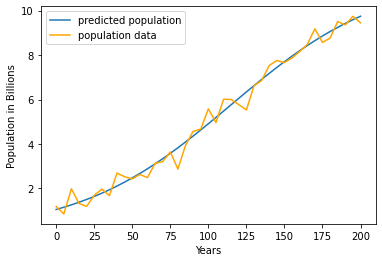

In [81]:
# Put your code here. Create additional code cells as is useful for necessary
from scipy.optimize import curve_fit

# import numpy and matplotlib as well while we're at it
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


pop200 = pd.read_csv("pop200.csv")
x = pop200['time']
y = pop200['population']

def calcpop(t,Pi,cck,k):
    A = (cck - Pi) / Pi
    p_t = cck / (1 + (A*np.exp(-1*k*t)))
    return p_t

params, pcov = curve_fit(calcpop, x, y, p0 = [10**9, 10**9, 0.1])
print(params)

predicted_Pi = params[0]
predicted_cck = params[1]
predicted_k = params[2]
predicted_y = calcpop(x, predicted_Pi, predicted_cck, predicted_k)
plt.plot(x, predicted_y/10**9, label= 'predicted population')
plt.plot(x, y/10**9, label = 'population data', color = 'orange')
plt.xlabel('Years')
plt.ylabel('Population in Billions')
plt.legend()
plt.show()

#### Interpreting your results and using your model to calculate expected values.

&#9989;&nbsp; Now that you've modeled the data using your logistic growth model, use your results to answers the following questions.

1. What does your model estimate as being the initial population for this civilization?
2. What does your model estimate as being the carry capacity of the population?
3. Using your model and the best fit parameters, calculate the expected population for this civilization at:
    - 177 years
    - 256 years

Ask your group for help if you're not sure how to find these answers.



<font size=+3>&#9998;</font> *Put your answers here.*

In [54]:
# Or use code to print out your answers
predicted_y = calcpop(0, predicted_Pi, predicted_cck, predicted_k)
print("predicted initial population:", predicted_y)
predicted_y = calcpop(177, predicted_Pi, predicted_cck, predicted_k)
print('expected population at 177 yrs:', predicted_y)
predicted_y = calcpop(256, predicted_Pi, predicted_cck, predicted_k)
print('expected population at 256 yrs:', predicted_y)

predicted initial population: 1055558888.5470951
expected population at 177 yrs: 8937887579.871122
expected population at 256 yrs: 10877371952.36039


In [55]:
def predictpop(t):
    return calcpop(t, predicted_Pi, predicted_cck, predicted_k)

print('predicted initial population:', predictpop(0))
print('expected population at 177 yrs:', predictpop(177))
print('expected population at 256 yrs:', predictpop(256))

predicted initial population: 1055558888.5470951
expected population at 177 yrs: 8937887579.871122
expected population at 256 yrs: 10877371952.36039


#### Using your model to forecast future values

&#9989;&nbsp; Using your model and the best-fit parameters, generate a new plot that shows the expected values for **every year for the first 300 years** of the civilization. Overplot the data you have for the first 200 years of growth.




In [56]:
# make it into array then make another array then concatenate the arrays

years = pop200['time'] #series 
first200 = years.values #turn the series into an array of the dates that are the values found in 'time'
next100 = 200 + np.arange(1,101) #add on 100 more years (arange is not inclusive)
first300 = np.concatenate((first200, next100)) #add 2 arrays together to create an array that has years 0 - 300. #needed 2 sets of parentheses to work
type(first300)

numpy.ndarray

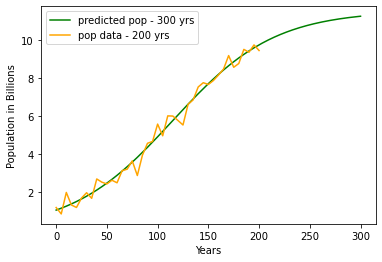

In [68]:
plt.plot(first300, predictpop(first300)/10**9, label = 'predicted pop - 300 yrs', color = 'green')
plt.plot(x, y/10**9, label = 'pop data - 200 yrs', color = 'orange')
plt.xlabel('Years')
plt.ylabel('Population in Billions')
plt.legend()
plt.show()

#### Comparing forecasted values to new data

&#9989;&nbsp; Now that you've predicted the growth of the population for a full 300 years, grab the `pop300.csv` data file which contains the most recent data available for this civilization, read it into your notebook and plot it along with your expected values.

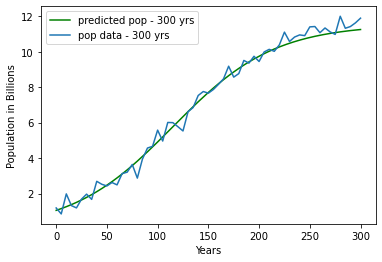

In [69]:
pop300 = pd.read_csv('pop300.csv')
plt.plot(first300, predictpop(first300)/10**9, label = 'predicted pop - 300 yrs', color = 'green')
plt.plot(pop300['time'], pop300['population']/10**9, label = 'pop data - 300 yrs')
plt.xlabel('Years')
plt.ylabel('Population in Billions')
plt.legend()
plt.show()

&#9989;&nbsp; **Question**: Do you still feel like the model is a good fit to the population data for this civilization? Explain why or why not. Are their any parameters of your model that seem particularly inaccurate given the new data?

<font size=+3>&#9998;</font> Not terrible, but doesn't fit as well as it should. Curve is a bit flatter btwn 200 and 300 than the best fit line would be.

#### Updating your model based on new data

Regardless of whether or not you think your current model is a good fit to the data, it's always worth checking to see if the new data provides a different set of best fit parameters. Folks who build and use models to understand the world around them are constantly using new data to revise and improve their models.

&#9989;&nbsp; Try recalibrating your best fit parameters by running `curve_fit` on the new data you've been provided. Then answer the following questions:
1. Which parameter(s) changed the most when you re-fit your model to the data?
2. Do any shifts you find in the parameter values agree with your "by eye" assessment of how well the model fit the data? Explain why or why not.

In [74]:
x2 = pop300['time']
y2 = pop300['population']
params2, pcov = curve_fit(calcpop, x2, y2, p0 = [10**9, 10**9, 0.1])
print('original parameters Pi, cck, k:', params)
print('new parameters Pi, cck, k:',params2)

original parameters Pi, cck, k: [1.05555889e+09 1.15288875e+10 1.99605475e-02]
new parameters Pi, cck, k: [1.10136981e+09 1.19986497e+10 1.91181273e-02]


<font size=+3>&#9998;</font> * Pi (initial population) changed the most (i think?)
* K (cck in model) is larger which translates to a higher y value at the same x value as we saw at the beginning of the assignment which matches with the curve being able to shift up to meet the data compared to the previous curve we had computed.

&#9989;&nbsp; Now that you have a new set of best fit parameters, make one final plot that shows the true glory of your expected model values along with the full set of data.

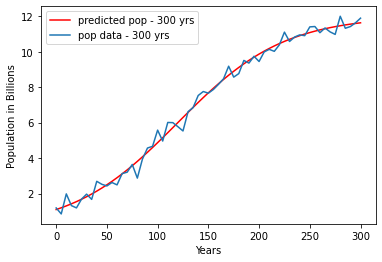

In [80]:
# Put your code here.
predicted_Pi2 = params2[0]
predicted_cck2 = params2[1]
predicted_k2 = params2[2]
predicted_y2 = calcpop(x2, predicted_Pi2, predicted_cck2, predicted_k2)
plt.plot(x2, predicted_y2/10**9, label= 'predicted pop - 300 yrs', color = 'red')
plt.plot(x2, y2/10**9, label = 'pop data - 300 yrs')
plt.xlabel('Years')
plt.ylabel('Population in Billions')
plt.legend()
plt.show()

---

## Congratulations, you're done!

Submit this assignment by uploading your notebook to the course Desire2Learn web page.  Go to the "In-Class Assignments" folder, find the appropriate submission link, and upload everything there. Make sure your name is on it!

&#169; Copyright 2020,  [Department of Computational Mathematics, Science and Engineering](https://cmse.msu.edu) at Michigan State University.